In [2]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
data = pd.read_excel('excel1.xlsx', sheet_name = 'Data')

In [4]:
%%time

price_df_list = []
for i in tqdm(range(120)):
    price_data = data.iloc[:,3*i:3*i+2].copy()
    price_data.dropna(inplace=True)
    price_data.iloc[:,0] = pd.to_datetime(price_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    price_data.rename(columns = {price_data.columns[0] : 'Date', price_data.columns[1]: price_data.columns[0]}, inplace = True)
    price_data.set_index('Date', inplace = True)
    price_df_list.append(price_data)

print(price_data)

agg_price_data = price_df_list[0]
for df in tqdm(price_df_list[1:]):
    agg_price_data = agg_price_data.join(df, how='outer', sort = True)

agg_price_data = agg_price_data[(agg_price_data.index >= '31/12/2018') & (agg_price_data.index <= '31/12/2020')].copy()

100%|██████████| 120/120 [00:00<00:00, 424.17it/s]


            NXI FP Equity
Date                     
2010-12-31        26.4957
2011-01-03        26.8603
2011-01-04        27.2288
2011-01-05        27.1047
2011-01-06        27.1861
...                   ...
2021-09-01        43.5800
2021-09-02        43.3600
2021-09-03        43.6600
2021-09-06        43.6200
2021-09-07        43.6800

[2734 rows x 1 columns]


100%|██████████| 119/119 [00:00<00:00, 769.60it/s]

CPU times: user 400 ms, sys: 79.1 ms, total: 479 ms
Wall time: 484 ms



/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:60: UserWarning: Parsing '31/12/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [5]:
agg_price_data

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,23.82,87.35,46.88,201.20,72.02,10.40,135.40,28.7069,46.180,20.740,...,54.0516,16.71,74.96,11.970,143.30,98.2205,12.485,72.70,42.20,39.40
2019-01-02,23.80,85.90,47.76,199.60,71.44,10.25,132.62,27.9126,46.655,20.570,...,54.2785,16.89,74.38,12.070,141.20,97.0790,12.145,72.45,41.62,38.48
2019-01-03,24.60,83.30,46.72,197.20,71.20,10.15,133.30,28.0050,46.255,19.256,...,51.4050,17.07,73.66,12.120,138.95,94.0515,10.735,70.25,39.00,38.28
2019-01-04,24.08,86.05,47.96,200.00,72.58,10.71,138.12,28.5222,47.410,20.010,...,53.2954,16.50,77.86,12.430,141.10,98.1709,10.905,72.45,39.70,38.50
2019-01-07,24.80,85.85,48.66,197.45,72.22,10.81,137.32,29.0764,47.300,20.400,...,52.7359,17.48,78.16,12.440,138.65,97.0790,11.350,73.65,38.92,38.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,16.03,292.60,37.94,302.30,82.36,11.54,65.62,30.7000,35.890,32.670,...,74.9800,15.02,94.42,7.370,157.75,152.5000,29.990,93.20,77.16,35.70
2020-12-28,16.36,293.00,38.14,309.10,83.84,11.56,65.42,30.4400,35.855,33.560,...,75.3000,15.08,95.36,7.205,159.00,154.4000,30.420,93.35,77.46,35.48
2020-12-29,16.02,295.60,38.26,312.20,83.12,11.72,65.52,30.8000,35.770,33.370,...,75.7600,15.11,95.20,7.470,161.05,159.6000,30.140,94.15,79.42,35.82


In [6]:
for ticker in tqdm(agg_price_data.columns):
    series = agg_price_data[ticker]
    first = series.first_valid_index()
    last = series.last_valid_index()
    series_real = series[(series.index >= first) & (series.index <= last)].fillna(method = 'bfill')
    agg_price_data[ticker][(agg_price_data[ticker].index >= first) & (agg_price_data[ticker].index <= last)] = series_real

100%|██████████| 120/120 [00:00<00:00, 948.06it/s]


In [7]:
for ticker in tqdm(agg_price_data.columns):
    if agg_price_data[ticker].isnull().values.any():
        print(ticker)
        nulls = agg_price_data[ticker].isnull()
        print(nulls[nulls == True].index)

100%|██████████| 120/120 [00:00<00:00, 10532.72it/s]

GTO NA Equity
DatetimeIndex(['2019-05-29', '2019-05-30', '2019-05-31', '2019-06-03',
               '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07',
               '2019-06-10', '2019-06-11',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=410, freq=None)
ING FP Equity
DatetimeIndex(['2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
           

- GTO -> Gemalto bought by Thales
- ING -> Ingenico bought by Worldline
- ALT -> Altran became subsidiary of Capgemini

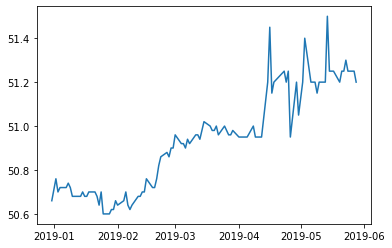

In [8]:
plt.plot(agg_price_data['GTO NA Equity'])
plt.show()

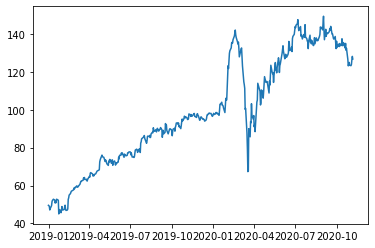

In [9]:
plt.plot(agg_price_data['ING FP Equity'])
plt.show()

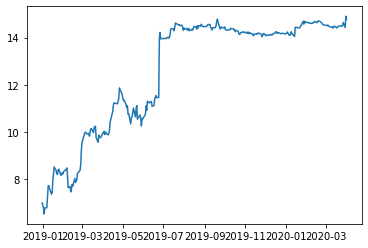

In [10]:
plt.plot(agg_price_data['ALT FP Equity'])
plt.show()

In [11]:
(agg_price_data - agg_price_data.shift(1))/agg_price_data.shift(1)

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.000840,-0.016600,0.018771,-0.007952,-0.008053,-0.014423,-0.020532,-0.027669,0.010286,-0.008197,...,0.004198,0.010772,-0.007737,0.008354,-0.014655,-0.011622,-0.027233,-0.003439,-0.013744,-0.023350
2019-01-03,0.033613,-0.030268,-0.021776,-0.012024,-0.003359,-0.009756,0.005127,0.003310,-0.008574,-0.063879,...,-0.052940,0.010657,-0.009680,0.004143,-0.015935,-0.031186,-0.116097,-0.030366,-0.062951,-0.005198
2019-01-04,-0.021138,0.033013,0.026541,0.014199,0.019382,0.055172,0.036159,0.018468,0.024970,0.039157,...,0.036775,-0.033392,0.057019,0.025578,0.015473,0.043799,0.015836,0.031317,0.017949,0.005747
2019-01-07,0.029900,-0.002324,0.014595,-0.012750,-0.004960,0.009337,-0.005792,0.019430,-0.002320,0.019490,...,-0.010498,0.059394,0.003853,0.000805,-0.017364,-0.011122,0.040807,0.016563,-0.019647,-0.003636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.004966,0.004118,-0.000527,-0.004610,-0.006753,-0.003454,0.009538,0.005898,0.000697,-0.010000,...,-0.003191,-0.001330,-0.004638,0.022191,0.003499,0.000000,-0.011536,0.000000,0.002338,0.000561
2020-12-28,0.020586,0.001367,0.005271,0.022494,0.017970,0.001733,-0.003048,-0.008469,-0.000975,0.027242,...,0.004268,0.003995,0.009956,-0.022388,0.007924,0.012459,0.014338,0.001609,0.003888,-0.006162
2020-12-29,-0.020782,0.008874,0.003146,0.010029,-0.008588,0.013841,0.001529,0.011827,-0.002371,-0.005662,...,0.006109,0.001989,-0.001678,0.036780,0.012893,0.033679,-0.009204,0.008570,0.025303,0.009583


In [12]:
agg_price_data.pct_change()

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,-0.000840,-0.016600,0.018771,-0.007952,-0.008053,-0.014423,-0.020532,-0.027669,0.010286,-0.008197,...,0.004198,0.010772,-0.007737,0.008354,-0.014655,-0.011622,-0.027233,-0.003439,-0.013744,-0.023350
2019-01-03,0.033613,-0.030268,-0.021776,-0.012024,-0.003359,-0.009756,0.005127,0.003310,-0.008574,-0.063879,...,-0.052940,0.010657,-0.009680,0.004143,-0.015935,-0.031186,-0.116097,-0.030366,-0.062951,-0.005198
2019-01-04,-0.021138,0.033013,0.026541,0.014199,0.019382,0.055172,0.036159,0.018468,0.024970,0.039157,...,0.036775,-0.033392,0.057019,0.025578,0.015473,0.043799,0.015836,0.031317,0.017949,0.005747
2019-01-07,0.029900,-0.002324,0.014595,-0.012750,-0.004960,0.009337,-0.005792,0.019430,-0.002320,0.019490,...,-0.010498,0.059394,0.003853,0.000805,-0.017364,-0.011122,0.040807,0.016563,-0.019647,-0.003636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.004966,0.004118,-0.000527,-0.004610,-0.006753,-0.003454,0.009538,0.005898,0.000697,-0.010000,...,-0.003191,-0.001330,-0.004638,0.022191,0.003499,0.000000,-0.011536,0.000000,0.002338,0.000561
2020-12-28,0.020586,0.001367,0.005271,0.022494,0.017970,0.001733,-0.003048,-0.008469,-0.000975,0.027242,...,0.004268,0.003995,0.009956,-0.022388,0.007924,0.012459,0.014338,0.001609,0.003888,-0.006162
2020-12-29,-0.020782,0.008874,0.003146,0.010029,-0.008588,0.013841,0.001529,0.011827,-0.002371,-0.005662,...,0.006109,0.001989,-0.001678,0.036780,0.012893,0.033679,-0.009204,0.008570,0.025303,0.009583


In [13]:
returns = agg_price_data.pct_change().dropna() # set returns to 0 when the stock disappears
returns

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.000840,-0.016600,0.018771,-0.007952,-0.008053,-0.014423,-0.020532,-0.027669,0.010286,-0.008197,...,0.004198,0.010772,-0.007737,0.008354,-0.014655,-0.011622,-0.027233,-0.003439,-0.013744,-0.023350
2019-01-03,0.033613,-0.030268,-0.021776,-0.012024,-0.003359,-0.009756,0.005127,0.003310,-0.008574,-0.063879,...,-0.052940,0.010657,-0.009680,0.004143,-0.015935,-0.031186,-0.116097,-0.030366,-0.062951,-0.005198
2019-01-04,-0.021138,0.033013,0.026541,0.014199,0.019382,0.055172,0.036159,0.018468,0.024970,0.039157,...,0.036775,-0.033392,0.057019,0.025578,0.015473,0.043799,0.015836,0.031317,0.017949,0.005747
2019-01-07,0.029900,-0.002324,0.014595,-0.012750,-0.004960,0.009337,-0.005792,0.019430,-0.002320,0.019490,...,-0.010498,0.059394,0.003853,0.000805,-0.017364,-0.011122,0.040807,0.016563,-0.019647,-0.003636
2019-01-08,0.038710,0.022714,0.014797,0.006077,0.012739,0.017576,0.031605,0.015882,-0.002114,0.014706,...,0.029824,0.089817,0.034033,0.027331,0.000361,0.018917,0.001762,0.015614,0.034943,0.036496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.004966,0.004118,-0.000527,-0.004610,-0.006753,-0.003454,0.009538,0.005898,0.000697,-0.010000,...,-0.003191,-0.001330,-0.004638,0.022191,0.003499,0.000000,-0.011536,0.000000,0.002338,0.000561
2020-12-28,0.020586,0.001367,0.005271,0.022494,0.017970,0.001733,-0.003048,-0.008469,-0.000975,0.027242,...,0.004268,0.003995,0.009956,-0.022388,0.007924,0.012459,0.014338,0.001609,0.003888,-0.006162
2020-12-29,-0.020782,0.008874,0.003146,0.010029,-0.008588,0.013841,0.001529,0.011827,-0.002371,-0.005662,...,0.006109,0.001989,-0.001678,0.036780,0.012893,0.033679,-0.009204,0.008570,0.025303,0.009583


In [14]:
df_mkt_cap_list = []
for i in tqdm(range(120)):
    mkt_cap_data = data.iloc[:,[3*i,3*i+2]].copy()
    mkt_cap_data.dropna(inplace = True)
    mkt_cap_data.iloc[:,0] = pd.to_datetime(mkt_cap_data.iloc[:,0], unit= 'D', origin= '1899-12-30')
    mkt_cap_data.rename(columns = {mkt_cap_data.columns[0] : 'Date', mkt_cap_data.columns[1]: mkt_cap_data.columns[0]}, inplace = True)
    mkt_cap_data.set_index('Date', inplace = True)
    df_mkt_cap_list.append(mkt_cap_data)

agg_mkt_cap_data = df_mkt_cap_list[0]
for df in tqdm(df_mkt_cap_list[1:]):
    agg_mkt_cap_data = agg_mkt_cap_data.join(df, how='outer', sort = True)

100%|██████████| 119/119 [00:00<00:00, 715.27it/s]


In [15]:
agg_mkt_cap_data

,QDT FP Equity,DIM FP Equity,RUI FP Equity,OR FP Equity,DG FP Equity,ALD FP Equity,URW NA Equity,KORI FP Equity,TTE FP Equity,DSY FP Equity,...,ATO FP Equity,MDM FP Equity,AKE FP Equity,MERY FP Equity,RI FP Equity,RCO FP Equity,STM FP Equity,ATE FP Equity,WLN FP Equity,NXI FP Equity
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,2074.1424,640.6889,1224.8148,49784.4831,22463.6902,NaN,13574.0125,528.1141,93138.4018,6750.9914,...,2782.3078,NaN,3305.5440,2584.3429,18592.8190,2603.4359,7045.2320,785.1392,NaN,1770.6669
2011-01-03,2080.8229,641.5386,1236.6203,51234.6330,23037.9831,NaN,13794.1317,538.7085,95346.4749,6786.8882,...,2830.8446,NaN,3330.7022,2593.5398,18796.2935,2618.1862,7356.5732,788.8118,NaN,1795.0327
2011-01-04,2116.7705,640.6889,1239.5716,50958.9847,22875.0827,NaN,13688.6579,540.9557,96614.9424,6833.5541,...,2789.9899,NaN,3308.6121,2593.0800,18471.2627,2607.3693,7370.2285,801.2667,NaN,1819.6576
2011-01-05,2115.8161,641.3687,1257.7014,50731.2752,22571.3701,NaN,13523.5686,544.4872,96990.7846,6783.2985,...,2812.3359,NaN,3270.5679,2639.5246,18207.0100,2649.6536,7544.1062,798.3925,NaN,1811.3629
2011-01-06,2149.2187,642.3883,1257.8420,50677.3440,22317.5758,NaN,13413.5090,549.6239,97601.5282,6807.2297,...,2814.7802,NaN,3276.7041,2617.4519,18164.7296,2610.8110,7652.4383,812.7636,NaN,1816.8063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,819.8323,48320.8556,3459.1215,222789.8633,56029.0137,4800.7512,10197.7771,3575.3571,97959.9281,65402.6198,...,5031.0874,880.8597,8559.9539,937.9261,48329.3191,8589.5157,34554.1988,4765.8506,21312.5103,2446.1334
2021-09-02,821.2148,49095.1692,3451.8435,223152.3500,55568.8288,4792.6692,10013.4466,3421.1922,99227.3342,65222.9971,...,5004.6891,874.5258,8525.4225,910.6991,48722.1340,8634.9896,34567.8674,4807.0836,21037.6549,2433.7848
2021-09-03,804.6246,48947.6809,3427.9301,220196.6897,54469.1660,4719.9305,9721.0123,3334.6065,98395.5989,64916.9733,...,4969.4912,863.6678,8544.6066,902.2493,48106.7241,8518.7785,34535.9740,4803.6475,20302.8375,2450.6237


In [16]:
agg_mkt_cap_data = agg_mkt_cap_data[(agg_mkt_cap_data.index >= '31/12/2018') & (agg_mkt_cap_data.index <= '31/12/2020')].copy()

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:60: UserWarning: Parsing '31/12/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)
/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [17]:
for ticker in tqdm(agg_mkt_cap_data.columns):
    if agg_mkt_cap_data[ticker].isnull().values.any():
        print(ticker)
        nulls = agg_mkt_cap_data[ticker].isnull()
        print(nulls[nulls == True].index)

100%|██████████| 120/120 [00:00<00:00, 8217.95it/s]

GTO NA Equity
DatetimeIndex(['2019-05-29', '2019-05-30', '2019-05-31', '2019-06-03',
               '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07',
               '2019-06-10', '2019-06-11',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=410, freq=None)
ING FP Equity
DatetimeIndex(['2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
           

In [18]:
agg_mkt_cap_data['ALO FP Equity']['11-2020']

Date
2020-11-02     8621.0510
2020-11-03     8442.7537
2020-11-04     8451.8295
2020-11-05     8805.7853
2020-11-06     9127.9758
2020-11-09     9677.0611
2020-11-10    10119.5059
2020-11-11     9670.2543
2020-11-12     9543.1932
2020-11-13     9529.5795
2020-11-16     9774.6259
2020-11-17           NaN
2020-11-18           NaN
2020-11-19           NaN
2020-11-20     9942.4990
2020-11-23     9616.3563
2020-11-24    10011.1427
2020-11-25    10268.1099
2020-11-26    10151.2593
2020-11-27    10552.6552
2020-11-30    10441.4796
Name: ALO FP Equity, dtype: float64

In [19]:
agg_mkt_cap_data['ALO FP Equity']['11-2020']/agg_price_data['ALO FP Equity']['11-2020']

Date
2020-11-02    244.668078
2020-11-03    244.694802
2020-11-04    244.695442
2020-11-05    244.694869
2020-11-06    244.694889
2020-11-09    244.695254
2020-11-10    244.694936
2020-11-11    244.695146
2020-11-12    244.695379
2020-11-13    244.695157
2020-11-16    244.695375
2020-11-17           NaN
2020-11-18           NaN
2020-11-19           NaN
2020-11-20    233.282473
2020-11-23    232.785192
2020-11-24    233.523273
2020-11-25    233.791209
2020-11-26    233.792246
2020-11-27    233.517486
2020-11-30    233.590148
Name: ALO FP Equity, dtype: float64

In [20]:
agg_mkt_cap_data['ALO FP Equity'].fillna(method = 'bfill', inplace = True)
agg_mkt_cap_data['ALO FP Equity']['11-2020']

Date
2020-11-02     8621.0510
2020-11-03     8442.7537
2020-11-04     8451.8295
2020-11-05     8805.7853
2020-11-06     9127.9758
2020-11-09     9677.0611
2020-11-10    10119.5059
2020-11-11     9670.2543
2020-11-12     9543.1932
2020-11-13     9529.5795
2020-11-16     9774.6259
2020-11-17     9942.4990
2020-11-18     9942.4990
2020-11-19     9942.4990
2020-11-20     9942.4990
2020-11-23     9616.3563
2020-11-24    10011.1427
2020-11-25    10268.1099
2020-11-26    10151.2593
2020-11-27    10552.6552
2020-11-30    10441.4796
Name: ALO FP Equity, dtype: float64

In [21]:
agg_mkt_cap_data.fillna(value = 0.0, inplace = True)

In [22]:
agg_mkt_cap_data.isnull().values.any()

False

In [23]:
from strategy import Strategy

In [24]:
sg_returns = agg_price_data['GLE FP Equity'].loc['2019':].pct_change().dropna()
longonly_sg = Strategy('Long Only SG', sg_returns)


In [28]:
type(longonly_sg)
longonly_sg.sharpe_ratio()

-0.19268302704926363

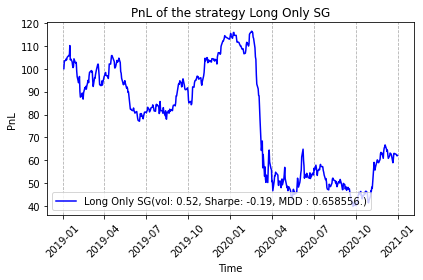

In [26]:
longonly_sg.illustrate()

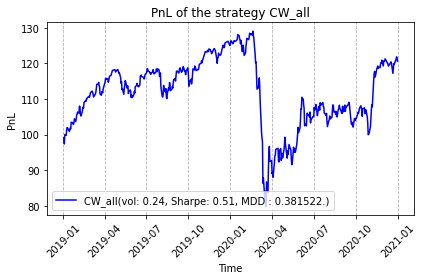

In [27]:

from strategy import CapiWeighted
cw_port = CapiWeighted('CW_all', returns, agg_mkt_cap_data)
cw_port.illustrate()